In [2]:
# mlp using keras for multiclass classification 
!pip install keras

In [3]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils
 

In [4]:
        
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

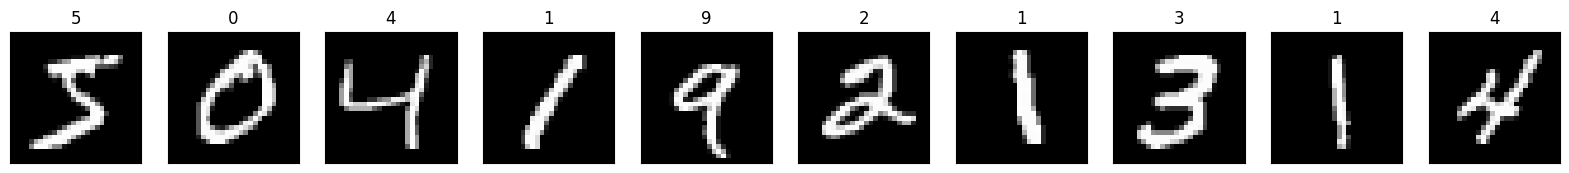

In [9]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

label value 3 will be converted into 10 dimensional output
[0,0,0,1,0,0,0,0,0,0]   so we use to_categorical() method for this 10d output

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train.shape

(60000, 10)

In [14]:
y_test.shape

(10000, 10)

In [15]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [18]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 15s 6ms/step - loss: 1.8190 - acc: 0.4382 - val_loss: 1.4488 - val_acc: 0.5550
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2253 - acc: 0.6762 - val_loss: 1.0131 - val_acc: 0.7499
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8961 - acc: 0.7702 - val_loss: 0.8354 - val_acc: 0.7963
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7484 - acc: 0.8001 - val_loss: 0.7201 - val_acc: 0.8030
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7033 - acc: 0.8007 - val_loss: 0.6575 - val_acc: 0.8138
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6763 - acc: 0.8038 - val_loss: 0.6489 - val_acc: 0.8146
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6544 - acc: 0.8060 - val_loss: 0.6220 - val_acc: 0.8200
Epoch 8/20
1875/1875 [==============================] -

In [19]:
pip install pydot


In [20]:
pip install --upgrade pydot

Note: you may need to restart the kernel to use updated packages.


In [21]:
import shutil
print(shutil.which("dot"))


C:\Program Files\Graphviz\bin\dot.EXE


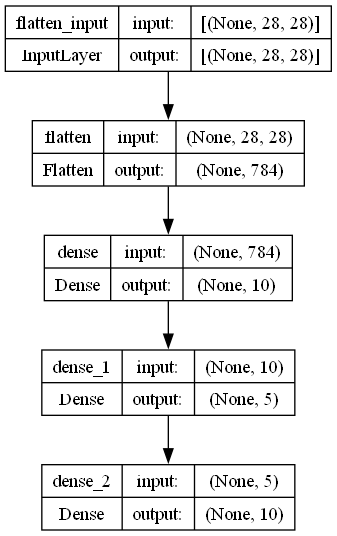

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file="model.png")


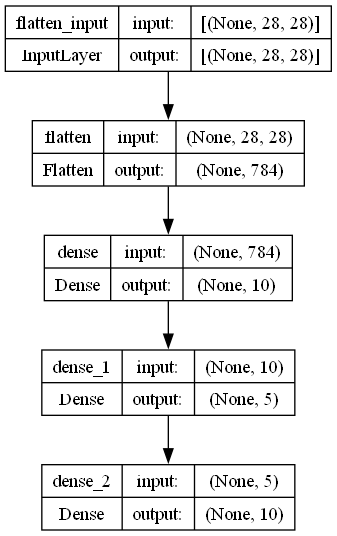

In [23]:
utils.plot_model(model,show_shapes=True)

In [25]:
model.save('mnist_model.keras')

HDF5 format (.h5):
The older Keras format, widely used and still works. Example:

model.save("model.h5")


New Keras format (.keras):
The recommended modern format, designed for better long-term support and easier compatibility. Example:

model.save("my_model.keras")


Both will save your model completely (architecture + weights + training config).
The difference is just which serialization format is used.

✅ If you’re just experimenting, you can ignore the warning.
🚀 If you want to follow best practice, switch to the new format:

# Save
model.save("my_model.keras")

# Load later
from tensorflow import keras
model = keras.models.load_model("my_model.keras")

In [27]:
from tensorflow import keras 
model = keras.models.load_model("mnist_model.keras")

model

notes

That means Graphviz is not installed OR its bin folder is not added to your PATH, so pydot cannot find the dot executable.

✅ Fix on Windows (step by step):

Install Graphviz

Download from: https://graphviz.gitlab.io/download/

Pick the Windows installer (64-bit recommended).

Install it (default location:

C:\Program Files\Graphviz\bin


Add Graphviz to PATH

Open Start Menu → Edit system environment variables.

Click Environment Variables.

Under System variables, select Path → Edit.

Add this entry:

C:\Program Files\Graphviz\bin


Save and restart your terminal/IDE (important).

Verify installation

Open Command Prompt (cmd.exe) and run:

dot -V


Expected output:

dot - graphviz version 8.x (some version number)


Re-run your Python code

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file="model.png")


⚡ About this part:

AttributeError: module 'pydot' has no attribute 'InvocationException'


That happens because of a pydot version mismatch. To fix:

pip install --upgrade pydot


👉 So, two fixes are needed:

Install Graphviz (and add to PATH).

Upgrade pydot to latest.

Do you want me to also give you the exact winget command so you can install Graphviz in Windows Terminal instead of downloading manually?

You said:
still shows same errror
ChatGPT said:

Got it 👍 Thanks for confirming — since you already installed Graphviz and added it to PATH, but still see

FileNotFoundError: [WinError 2] "dot" not found in path.


that means Python (pydot) still cannot locate the dot.exe.

Let’s fix this systematically:

✅ Step 1: Check Graphviz installation

Open Windows CMD / PowerShell and run:

where dot


If it prints something like:

C:\Program Files\Graphviz\bin\dot.exe


→ good, Graphviz is installed and visible.

If it says:

INFO: Could not find files for the given pattern(s).


→ PATH is not set correctly.

✅ Step 2: Fix PATH manually

If where dot fails, add the correct path:

Find where Graphviz is installed. (Usually: C:\Program Files\Graphviz\bin)
You should see dot.exe inside that folder.

Add it to PATH:

Open Start Menu → Edit system environment variables

Click Environment Variables

Under System variables, edit Path → Add:

C:\Program Files\Graphviz\bin


Restart your terminal / Jupyter Notebook.

✅ Step 3: Upgrade pydot (fixes InvocationException issue)

Run:

pip install --upgrade pydot

✅ Step 4: Test inside Python

Run:

import shutil
print(shutil.which("dot"))


If it prints a full path (C:\Program Files\Graphviz\bin\dot.exe) → success.

If it prints None → PATH still not fixed.

✅ Step 5: Plot model again
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file="model.png")


⚡ Question for you:
When you run where dot in Windows Terminal, what output do you get? That will tell us whether it’s a PATH problem or a Python/pydot problem.

Perfect 👍 that explains everything — since shutil.which("dot") shows None, your PATH is not actually set for Graphviz. Python (and pydot) literally can’t find dot.exe.

Let’s fix it cleanly:

🔧 Step 1: Find where Graphviz installed

Open File Explorer.

Navigate to:

C:\Program Files\


Look for a folder named Graphviz, Graphviz8, or similar.

Inside it, open bin → make sure you see dot.exe there.
Example path:

C:\Program Files\Graphviz\bin\dot.exe

🔧 Step 2: Add Graphviz to PATH

Press Win + R, type:

sysdm.cpl


→ Enter.

Go to Advanced → Environment Variables.

In System variables, find Path → Edit.

Click New, then paste the folder path (not dot.exe, only bin folder), e.g.:

C:\Program Files\Graphviz\bin


Click OK until all dialogs close.

Restart your terminal / Anaconda Prompt.

🔧 Step 3: Verify

Open Command Prompt and run:

where dot


Expected:

C:\Program Files\Graphviz\bin\dot.exe


Then in Python:

import shutil
print(shutil.which("dot"))


Expected:

C:\Program Files\Graphviz\bin\dot.exe

🔧 Step 4: Retry plot_model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True)


⚡ If you want to skip the manual PATH edits, you can also install Graphviz via Windows package manager in PowerShell:

winget install graphviz


This will auto-handle PATH for you.
Nice — that output means Graphviz is already installed on your system via winget ✅.

But since shutil.which("dot") was still returning None, the problem is that its install location isn’t in PATH.

🔎 Step 1: Locate Graphviz installed by winget

Run this in PowerShell to find where it’s installed:

winget show graphviz


Or search manually:

Get-Command dot.exe


This will show the full path to dot.exe.

🔧 Step 2: Add that path to PATH

If dot.exe is found at something like:

C:\Users\Welcome\AppData\Local\Microsoft\WinGet\Packages\Graphviz.Graphviz_Microsoft.Winget.Source\bin\dot.exe


then add its bin folder (the part before dot.exe) to your PATH:

C:\Users\Welcome\AppData\Local\Microsoft\WinGet\Packages\Graphviz.Graphviz_Microsoft.Winget.Source\bin

🔎 Step 3: Verify

Close & reopen your terminal, then run:

where.exe dot


You should see the full path.

Then in Python:

import shutil
print(shutil.which("dot"))


It should no longer be None.


Perfect 👍 this confirms that Graphviz is installed, but Windows doesn’t know where it is (PATH not set). That’s why Python and pydot keep failing with "dot not found".

Let’s fix this once and for all 🚀

🔎 Step 1: Find Graphviz manually

Since winget installed it, the usual location is one of these:

C:\Program Files\Graphviz\bin

C:\Program Files (x86)\Graphviz\bin

C:\Users\<YourUser>\AppData\Local\Microsoft\WinGet\Packages\Graphviz.Graphviz*\bin

👉 Open File Explorer and search for dot.exe in your C: drive.
Once you find it, copy the folder path (the one containing dot.exe).

🔧 Step 2: Add Graphviz to PATH

Press Win + R, type:

sysdm.cpl


→ Enter.

Go to Advanced → Environment Variables.

Under System variables, select Path → Edit.

Click New, then paste the folder path from Step 1.
Example:

C:\Program Files\Graphviz\bin


Save → OK → OK → Restart your terminal (or Anaconda Prompt).

🔎 Step 3: Verify

In PowerShell / CMD, run:

where dot


Expected output:

C:\Program Files\Graphviz\bin\dot.exe


Then in Python:

import shutil
print(shutil.which("dot"))


Should return the full path instead of None.

⚡ Once that works, plot_model will run fine.

👉 Do you want me to give you a PowerShell command that searches for dot.exe automatically and tells you its location, so you don’t have to dig manually in File Explorer?

You said:
yes
ChatGPT said:

Great 👍 here’s a PowerShell command that will automatically search your whole C: drive for dot.exe and show you where it is installed:

Get-ChildItem -Path C:\ -Filter dot.exe -Recurse -ErrorAction SilentlyContinue -Force


⚡ Notes:

This may take a minute since it searches all folders.

When it finds dot.exe, it will print the full path.
Example:

C:\Program Files\Graphviz\bin\dot.exe

After you find it:

Copy the folder path (everything before dot.exe).
Example:

C:\Program Files\Graphviz\bin


Add that folder to your PATH (via Environment Variables).

Restart your terminal, then check:

where dot


→ Should show the full path.

Test in Python:

import shutil
print(shutil.which("dot"))


→ Should now show the correct location.

👉 Do you want me to also give you a one-liner PowerShell script that not only finds dot.exe but also adds it to PATH automatically so you don’t have to do the clicks?

You said:
import shutil
print(shutil.which("dot"))    shows none value
ChatGPT said:

Thanks for checking 🙏 — if print(shutil.which("dot")) still shows None, it means:

Graphviz is installed, but

Windows PATH doesn’t yet include the folder that contains dot.exe.

Let’s automate the fix.

🔎 Step 1: Auto-locate Graphviz

Run this in PowerShell:

Get-ChildItem -Path "C:\" -Filter dot.exe -Recurse -ErrorAction SilentlyContinue -Force


This will search your C: drive for dot.exe and show the full path.
Example output:

C:\Program Files\Graphviz\bin\dot.exe

🔧 Step 2: Add Graphviz to PATH (Automatic PowerShell Method)

Once you know the folder (say C:\Program Files\Graphviz\bin), run:

setx PATH "$env:PATH;C:\Program Files\Graphviz\bin"


⚠️ Replace the path above with the actual folder that contains dot.exe.

Then restart your PowerShell / Anaconda Prompt.

🔎 Step 3: Verify

In PowerShell:

where dot


Expected:

C:\Program Files\Graphviz\bin\dot.exe


In Python:

import shutil
print(shutil.which("dot"))


Expected:

C:\Program Files\Graphviz\bin\dot.exe


⚡ Question: Do you want me to write you a single PowerShell script that (1) finds dot.exe, (2) automatically adds it to PATH, and (3) confirms the fix — so you don’t have to do anything manually?

You said:
where dot doesnt give any result
ChatGPT said:

Got it 👍 — if where dot gives no result, Windows still cannot see any dot.exe on PATH. That means either:

Graphviz was not actually installed, or

It installed, but in a folder not linked to PATH.

Let’s track it down step by step.

🔎 Step 1: Search for Graphviz manually

Run this PowerShell command (it might take 1–2 minutes but it will find it if installed):

Get-ChildItem -Path "C:\" -Filter dot.exe -Recurse -ErrorAction SilentlyContinue -Force


This will scan your whole C: drive for dot.exe.
If Graphviz is installed, you should see output like:

C:\Program Files\Graphviz\bin\dot.exe

🔎 Step 2: If no results

If the above search finds nothing, then Graphviz is not installed at all (winget may have failed silently).

👉 In that case, reinstall with:

winget install --id=Graphviz.Graphviz -e --source winget


This will install the latest Graphviz properly.

🔧 Step 3: Add to PATH

If Step 1 finds dot.exe, copy the folder path (not the exe). Example:

C:\Program Files\Graphviz\bin


Then add it to PATH with:

setx PATH "$env:PATH;C:\Program Files\Graphviz\bin"


(Replace with your actual path!)

Restart terminal after this.

✅ Step 4: Verify

Now check again:

where dot


Then in Python:

import shutil
print(shutil.which("dot"))


⚡ Question: Do you want me to give you a ready-to-run script that will (1) search for Graphviz, (2) install it if missing, and (3) set PATH automatically — all in one PowerShell run?

You said:
which terminal and how should i restart
ChatGPT said:

Great question 🙌 — because on Windows you may have multiple terminals (CMD, PowerShell, Anaconda Prompt, VS Code terminal, Jupyter, etc.), and PATH changes only apply after a restart of the terminal/IDE.

Here’s how to handle it step by step:

✅ 1. Which terminal?

Since you’re running Python in Anaconda (env: mycorrectenv), the important ones are:

Anaconda Prompt (or Anaconda PowerShell Prompt) → where you launch Python/Jupyter.

VS Code Terminal (if you start Python/Jupyter from there).

Jupyter Notebook / JupyterLab (if launched via Anaconda).

✅ 2. How to restart

After you add Graphviz’s bin folder to PATH:

Close all open terminals (CMD, PowerShell, Anaconda Prompt, VS Code, Jupyter).

Reopen the one you normally use (e.g., Anaconda Prompt).

Then activate your env again:

conda activate mycorrectenv

✅ 3. Verify PATH is applied

Now run in the same terminal:

where dot


If PATH was applied correctly, you’ll see:

C:\Program Files\Graphviz\bin\dot.exe


And in Python:

import shutil
print(shutil.which("dot"))


Should show the same.

⚡ Tip: If it still doesn’t show up, restart your whole PC once — that guarantees the new PATH is loaded everywhere.

👉 Do you want me to give you a PowerShell snippet that confirms the exact PATH your current terminal sees? That way we can double-check if the Graphviz folder is really there.

You said:
where dot    import shutil
print(shutil.which("dot"))     doesnt give any result
ChatGPT said:

Thanks 🙏 — if both

where dot


and

import shutil
print(shutil.which("dot"))


return nothing, then Windows still doesn’t know where dot.exe is.

That means one of two things is true:

Graphviz never actually installed (winget didn’t put it in a usable location), or

It installed, but to a folder not in PATH, and we haven’t found it yet.

🔎 Step 1: Confirm whether Graphviz is installed at all

Run this in PowerShell (it’s faster than a blind search of C:):

winget list --id Graphviz.Graphviz


If you see something like Graphviz 8.x, then it’s installed.

If you see no results, then Graphviz is missing.

🔎 Step 2: If Graphviz is installed → find dot.exe

Run this (may take 1–2 minutes but guaranteed to find it):

Get-ChildItem -Path "C:\" -Filter dot.exe -Recurse -ErrorAction SilentlyContinue -Force


That will print the exact folder containing dot.exe.

🔧 Step 3: Add folder to PATH

Once you find it (say it’s here):

C:\Program Files\Graphviz\bin\dot.exe


You add this to PATH (folder only, not the exe):

setx PATH "$env:PATH;C:\Program Files\Graphviz\bin"


Then close your terminal (Anaconda Prompt, PowerShell, VS Code) and reopen.

🔎 Step 4: Verify again

In new terminal:

where dot


In Python:

import shutil
print(shutil.which("dot"))


Both should return the path.

⚡ If Step 1 shows Graphviz is not installed, then we should reinstall it cleanly.
You can do either:

Option A (winget):

winget install --id=Graphviz.Graphviz -e


Option B (manual installer):
Download from: https://graphviz.gitlab.io/download/
 → Windows (64-bit MSI) → Install → Add C:\Program Files\Graphviz\bin to PATH.

Got it ✅ — thanks for sharing the full traceback.
Your error confirms two separate issues:

Graphviz dot.exe is still not in PATH → hence FileNotFoundError: "dot" not found in path.

Your pydot package is old / broken → it doesn’t have InvocationException.

We need to fix both.

🔧 Step 1: Fix Graphviz (make dot.exe discoverable)

Uninstall any broken install:

winget uninstall Graphviz.Graphviz


Reinstall cleanly (MSI installer is most reliable on Windows):

Download from official site: Graphviz Windows installer (x64 MSI)

Run installer → during setup, check "Add Graphviz to the system PATH for all users".

Restart your terminal (PowerShell, Anaconda Prompt, VS Code).

Verify:

where dot


Expected:

C:\Program Files\Graphviz\bin\dot.exe


And in Python:

import shutil
print(shutil.which("dot"))


Expected: full path.

🔧 Step 2: Fix pydot

Your current version doesn’t match Keras’ expectations.
Run this in your environment (mycorrectenv):

pip uninstall -y pydot pydotplus
pip install pydot==1.4.2 pydotplus==2.0.2


These versions are stable and tested with TensorFlow/Keras plot_model.

🔧 Step 3: Test

Run again in Python:

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file="model.png")


If everything is correct:

dot.exe runs successfully,

model.png will be saved in your working directory.

 